# PREDICCIÓN DE INCIDENTES VIALES EN MEDELLIN

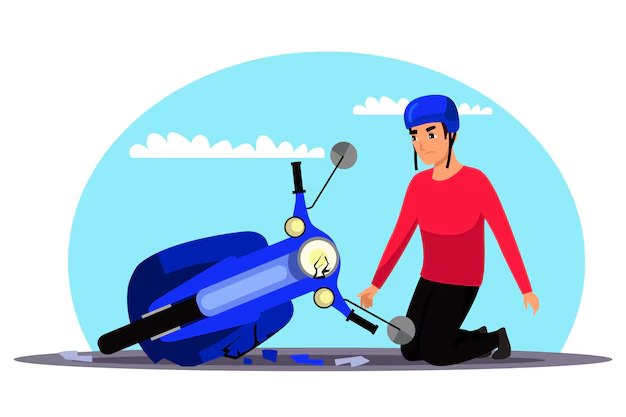

**1. Hipótesis**

Mediante el uso de modelos de aprendizaje automático, se podrá predecir con precisión los horarios y zonas más propensos a incidentes viales con motos en Medellín, identificando patrones en la ocurrencia de estos accidentes que permitan definir las áreas y momentos de mayor riesgo.

**2. Descripción del Problema**

La movilidad en Medellín enfrenta grandes desafíos en cuanto a la seguridad vial, especialmente en accidentes que involucran motocicletas, un medio de transporte ampliamente utilizado en la ciudad. Los incidentes viales con motos representan un alto porcentaje de los accidentes y pueden ser prevenibles si se identifican patrones específicos de riesgo en horarios y zonas precisas. Sin embargo, actualmente, la falta de información predictiva limita las intervenciones oportunas, lo que impide reducir la frecuencia y gravedad de estos incidentes.

**3. Análisis Descriptivo**

Se realizará la importación de las bibliotecas necesarias para el modelo de aprendizaje automático y análisis de datos que se va a implementar.  Por lo tanto, estas bibliotecas establecen el entorno para la carga, preprocesamiento, modelado y evaluación de datos en nuestro proyecto de predicción que se llevará a cabo.

In [22]:
#Importación de las librerias usadas en el código
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
import warnings


***3.1. Visualización del Dataset***

Ahora se cargará el archivo donde se encuentra el dataset para luego hacer uso de este y hacer una visualización de las variables que se va a utilizar. Después se analizará la información detallada de los datos, para obtener una visión general del contenido y estructura del conjunto de datos, lo  cual sera útil en la preparación para el análisis del modelado.


In [25]:
#Cargar el archivo del dataset en formato CSV
data= pd.read_csv ('C:\\Users\\krsar\\Downloads\\incidentes_viales_motos.csv')

In [101]:
data#Mostrar el dataset 

,NRO_RADICADO,AÑO_INCIDENTE,FECHA_INCIDENTE,HORA_INCIDENTE,CLASE_INCIDENTE,GRAVEDAD_INCIDENTE,DIRECCION,ZONA,Diseño Vía,AÑO,MES,DÍA,ZONA_NUM
0,1471551,2015,2015-01-10,23,2,0,Carrera 80 Con Calle 44 B,COMUNA 12,Tramo de via,2015,1,10,0
1,1471559,2015,2015-01-10,20,0,0,Carrera 111 Con Calle 34 CC,COMUNA 13,Tramo de via,2015,1,10,1
2,1471643,2015,2015-01-10,17,2,2,Carrera 49 Con Calle 79,COMUNA 4,Tramo de via\r,2015,1,10,2
3,1471663,2015,2015-01-10,20,2,2,Calle 30 Con Carrera 79 A,COMUNA 16,Tramo de via\r,2015,1,10,3
4,1471664,2015,2015-01-10,14,2,2,Calle 44 A Con Carrera 73,COMUNA 11,Ciclo Ruta\r,2015,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
223434,1759980,2021,2021-08-30,16,2,2,Carrera 25 B Con Calle 20 Sur,COMUNA 14,Interseccion\r,2021,8,30,7
223435,1760061,2021,2021-08-30,16,0,0,Carrera 74 Con Calle 92,COMUNA 7,Lote o Predio,2021,8,30,10
223436,1760346,2021,2021-08-30,16,2,2,Carrera 46 Con Calle 52,COMUNA 10,Tramo de via\r,2021,8,30,11
223437,1760375,2021,2021-08-30,17,2,0,Carrera 46 Con Calle 53,COMUNA 10,Tramo de via,2021,8,30,11


In [27]:
data.head()

,NRO_RADICADO,AÑO_INCIDENTE,FECHA_INCIDENTE,HORA_INCIDENTE,CLASE_INCIDENTE,GRAVEDAD_INCIDENTE,DIRECCION,ZONA,Diseño Vía
0,1471551,2015,10/01/2015,23:23:00,Choque,HERIDO,Carrera 80 Con Calle 44 B,COMUNA 12,Tramo de via
1,1471559,2015,10/01/2015,20:00:00,Atropello,HERIDO,Carrera 111 Con Calle 34 CC,COMUNA 13,Tramo de via
2,1471643,2015,10/01/2015,17:40:00,Choque,SOLO DA\xD1OS,Carrera 49 Con Calle 79,COMUNA 4,Tramo de via\r
3,1471663,2015,10/01/2015,20:20:00,Choque,SOLO DA\xD1OS,Calle 30 Con Carrera 79 A,COMUNA 16,Tramo de via\r
4,1471664,2015,10/01/2015,14:50:00,Choque,SOLO DA\xD1OS,Calle 44 A Con Carrera 73,COMUNA 11,Ciclo Ruta\r


In [103]:
data.info()#Ver columnas y los tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 223432 entries, 0 to 223438
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   NRO_RADICADO        223432 non-null  int64         
 1   AÑO_INCIDENTE       223432 non-null  int64         
 2   FECHA_INCIDENTE     223432 non-null  datetime64[ns]
 3   HORA_INCIDENTE      223432 non-null  int32         
 4   CLASE_INCIDENTE     223432 non-null  int32         
 5   GRAVEDAD_INCIDENTE  223432 non-null  int32         
 6   DIRECCION           223432 non-null  object        
 7   ZONA                223432 non-null  object        
 8   Diseño Vía          223432 non-null  object        
 9   AÑO                 223432 non-null  int32         
 10  MES                 223432 non-null  int32         
 11  DÍA                 223432 non-null  int32         
 12  ZONA_NUM            223432 non-null  int64         
dtypes: datetime64[ns](1), int32(6), in

***3.2. Distribución de las columnas claves***

En esta sección se elimina los espacios en blanco en las columnas "GRAVEDAD_INCIDENTE", "Diseño Vía" y "ZONA" para estandarizar los datos. Luego, utiliza el metodo ".unique()" para verificar que los valores sean consistentes tras la limpieza.

In [30]:
#Limpiar espacios y caracteres especiales
data['GRAVEDAD_INCIDENTE'] = data['GRAVEDAD_INCIDENTE'].str.strip()
data['Diseño Vía'] = data['Diseño Vía'].str.strip()
data['ZONA'] = data['ZONA'].str.strip()

#Verificar la limpieza
data['Diseño Vía'].unique()
data['ZONA'].unique()
data['GRAVEDAD_INCIDENTE'].unique()

array(['HERIDO', 'SOLO DA\\xD1OS', 'MUERTO'], dtype=object)

***3.2.1. Distribución de la Clase de Incidentes***

Como se puede observar se distribuye la variable "CLASE_INCIDENTE", lo que permitirá identificar la cantidad de datos que hay para cada una de las clases. Además, se muestra la frecuencia de cada clase de incidente, ayudando a identificar cuáles son los tipos más y menos comunes.

C:\Users\krsar\AppData\Local\Temp\ipykernel_2296\3250928825.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clase_incidente_counts.index, y=clase_incidente_counts.values, palette='viridis')


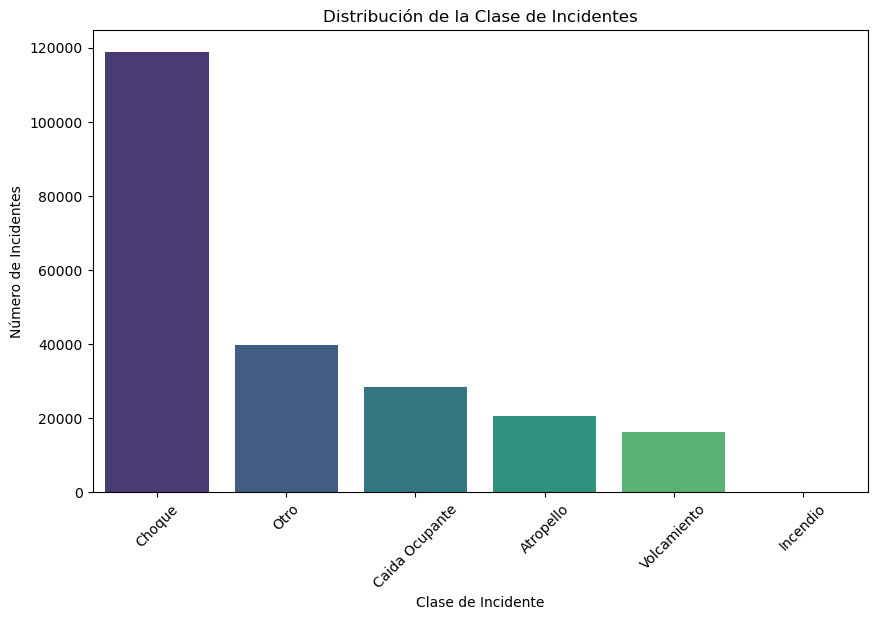

In [32]:
#Contar las ocurrencias de cada clase de incidente
clase_incidente_counts = data['CLASE_INCIDENTE'].value_counts(dropna=False)

#Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=clase_incidente_counts.index, y=clase_incidente_counts.values, palette='viridis')
plt.title('Distribución de la Clase de Incidentes')
plt.xlabel('Clase de Incidente')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.show()

***3.2.2. Distribución de Gravedad de Incidentes***


Este código cuenta la cantidad de incidentes según su gravedad en la columna "GRAVEDAD_INCIDENTE" y los visualiza en un gráfico de barras. Esto ayudará a identificar cómo se distribuyen los incidentes según su gravedad, permitiendo observar fácilmente las categorías de gravedad más frecuentes.

C:\Users\krsar\AppData\Local\Temp\ipykernel_2296\2643475256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gravedad_counts.index, y=gravedad_counts.values, palette='magma')


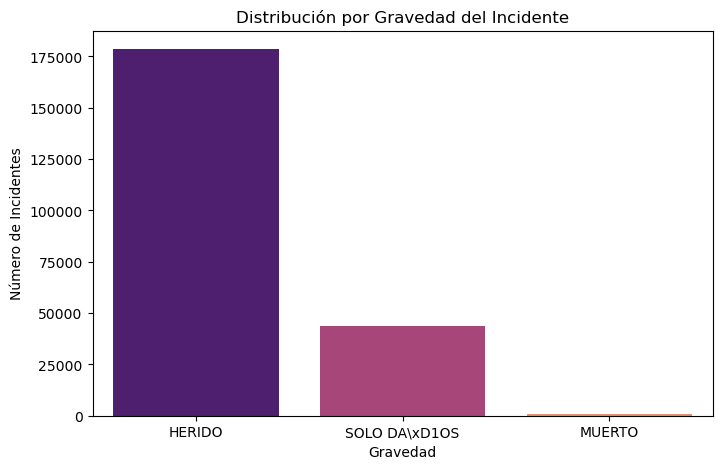

In [34]:
#Contar las ocurrencias por gravedad del incidente
gravedad_counts = data['GRAVEDAD_INCIDENTE'].value_counts()

#Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x=gravedad_counts.index, y=gravedad_counts.values, palette='magma')
plt.title('Distribución por Gravedad del Incidente')
plt.xlabel('Gravedad')
plt.ylabel('Número de Incidentes')
plt.show()

***3.2.3. Distribución de Incidentes por Año***

En este código se muestra la distribucion de los accidentes que se presentaron por año, lo que va a permitir obtener patrones temporales y cambios en la frecuencia de incidentes por año.

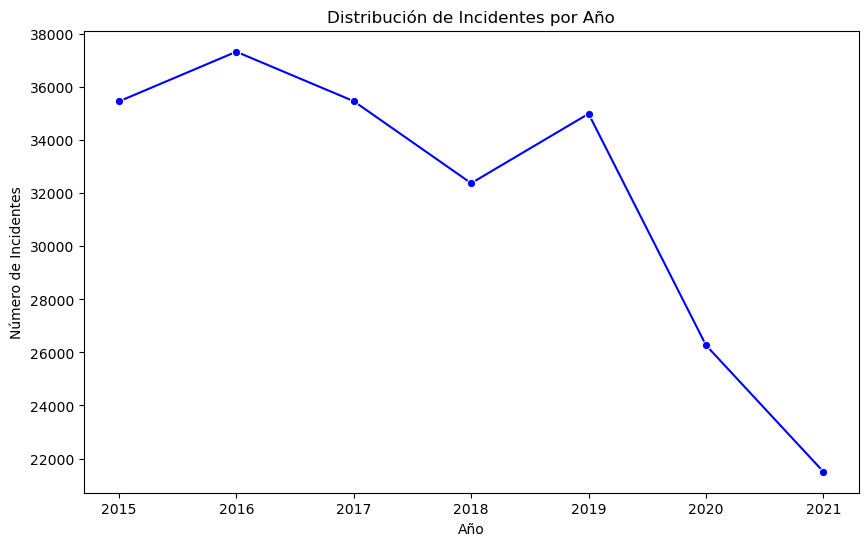

In [36]:
#Contar los incidentes por año
anio_counts = data['AÑO_INCIDENTE'].value_counts().sort_index()

#Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(x=anio_counts.index, y=anio_counts.values, marker='o', color='b')
plt.title('Distribución de Incidentes por Año')
plt.xlabel('Año')
plt.ylabel('Número de Incidentes')
plt.show()

***3.2.4. Distribución de Zonas con Número de Incidentes***

Este código proporcionará un gráfico que permitirá destacar las zonas con más incidentes, lo cual puede ser útil para identificar áreas prioritarias en términos de seguridad o intervención.

C:\Users\krsar\AppData\Local\Temp\ipykernel_2296\2935839275.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=zona_counts.index, x=zona_counts.values, palette='cubehelix')


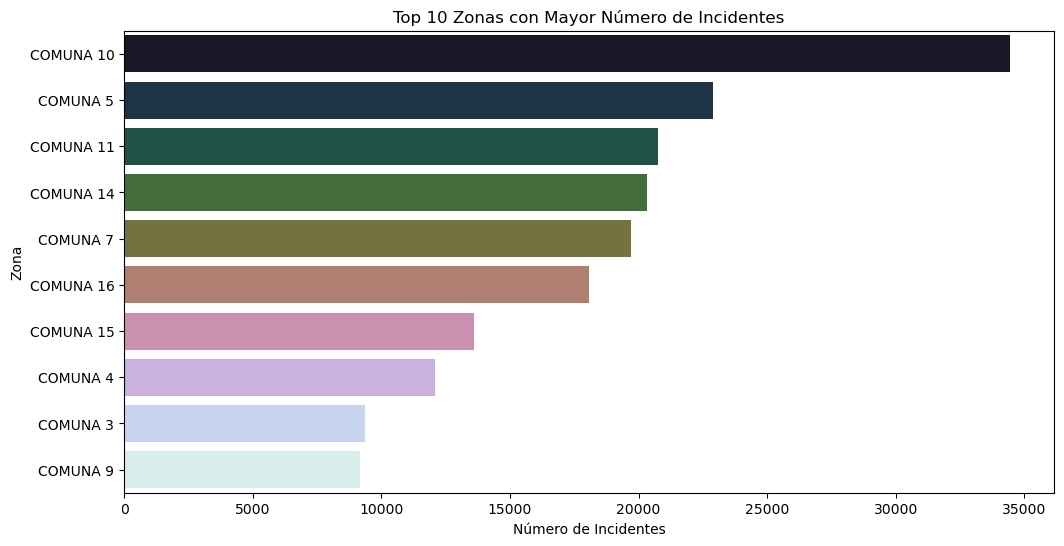

In [38]:
#Contar los incidentes por zona
zona_counts = data['ZONA'].value_counts().head(10)  # Top 10 zonas

#Graficar
plt.figure(figsize=(12, 6))
sns.barplot(y=zona_counts.index, x=zona_counts.values, palette='cubehelix')
plt.title('Top 10 Zonas con Mayor Número de Incidentes')
plt.xlabel('Número de Incidentes')
plt.ylabel('Zona')
plt.show()


***3.2.5. Distribución de Incidentes por Hora***

Este código extrae la hora de los incidentes, la convierte a un formato de tiempo y cuenta cuántos incidentes ocurrieron en cada hora del día, lo que va a permitir visualizar en qué horas del día ocurren más incidentes, lo que puede ser útil para análisis de patrones temporales.

C:\Users\krsar\AppData\Local\Temp\ipykernel_2296\3815490078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hora_counts.index, y=hora_counts.values, palette='coolwarm')


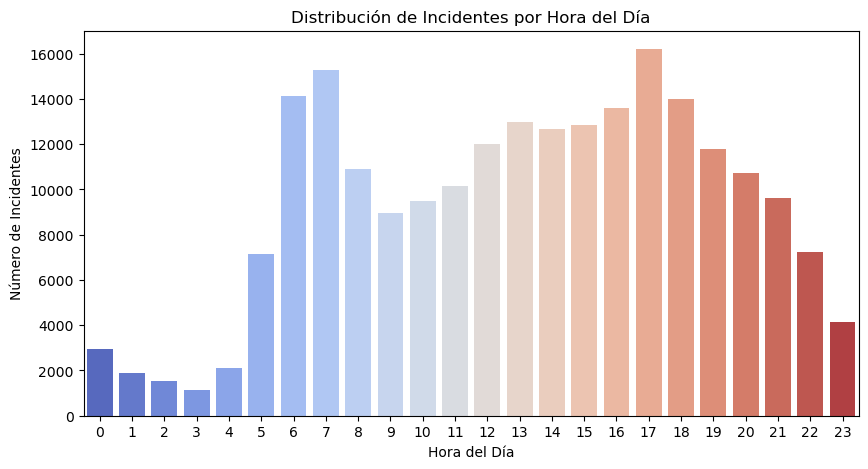

In [40]:
#Extraer la hora y convertirla en un formato de tiempo
data['HORA_INCIDENTE'] = pd.to_datetime(data['HORA_INCIDENTE'], format='%H:%M:%S', errors='coerce').dt.hour
hora_counts = data['HORA_INCIDENTE'].value_counts().sort_index()

#Graficar
plt.figure(figsize=(10, 5))
sns.barplot(x=hora_counts.index, y=hora_counts.values, palette='coolwarm')
plt.title('Distribución de Incidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Incidentes')
plt.show()

**4. Limpieza de Datos**

Este código elimina las filas con valores nulos y limpia las variables que contengan caracteres que no necesitaremos, para que más adelante podamos hacer la caracterización de estas variables.

In [42]:
#Manejo de valores nulos para luego eliminarlos
data.dropna(inplace=True)  # Eliminar filas con valores nulos

#Función para convertir fechas
def convert_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d/%m/%Y')
    except ValueError:
        return pd.to_datetime(date_str, format='%d/%m/%y')  # Intentar con año de dos dígitos

#Aplicar la función a la columna FECHA_INCIDENTE
data['FECHA_INCIDENTE'] = data['FECHA_INCIDENTE'].apply(convert_date)

#Verificar las conversiones
print(data['FECHA_INCIDENTE'].head())

0   2015-01-10
1   2015-01-10
2   2015-01-10
3   2015-01-10
4   2015-01-10
Name: FECHA_INCIDENTE, dtype: datetime64[ns]


In [43]:
#Imprimir los valores únicos de la columna GRAVEDAD_INCIDENTE
print(data['GRAVEDAD_INCIDENTE'].unique())

['HERIDO' 'SOLO DA\\xD1OS' 'MUERTO']


In [44]:
#Limpiar la columna GRAVEDAD_INCIDENTE
data['GRAVEDAD_INCIDENTE'] = data['GRAVEDAD_INCIDENTE'].str.replace(r'\\xD1', 'Ñ')#Reemplazar el carácter problemático
data['GRAVEDAD_INCIDENTE'] = data['GRAVEDAD_INCIDENTE'].str.replace('SOLO DA\\xD1OS', 'SOLO DAÑOS')#Reemplazar el valor problemático
data['GRAVEDAD_INCIDENTE'] = data['GRAVEDAD_INCIDENTE'].str.strip()#Eliminar espacios en blanco

#Verificar nuevamente los valores únicos
print("Valores únicos en GRAVEDAD_INCIDENTE después de limpieza:", data['GRAVEDAD_INCIDENTE'].unique())

Valores únicos en GRAVEDAD_INCIDENTE después de limpieza: ['HERIDO' 'SOLO DAÑOS' 'MUERTO']


**5. Caracterización de Variables Claves**

El código hace la caracterización de las variables claves, transformando las variables temporales y categóricas en formatos numéricos para facilitar el análisis y modelado, extrayendo componentes de fechas, convirtiendo horas y zonas a valores numéricos. Por último, se clasifica cada una de las clases y la gravedad de incidentes en valores numéricos.

In [46]:
#Extraer año y mes
data['AÑO'] = data['FECHA_INCIDENTE'].dt.year
data['MES'] = data['FECHA_INCIDENTE'].dt.month
data['DÍA'] = data['FECHA_INCIDENTE'].dt.day

#Convertir HORA_INCIDENTE a formato datetime y sobrescribir la columna existente
data['HORA'] = pd.to_datetime(data['HORA_INCIDENTE']).dt.hour

#Eliminar la columna "HORA"
data.drop(columns=['HORA'], inplace=True)

#Aplicar la transformación y almacenar los valores numéricos en la columna 'CLASE_INCIDENTE'
le_clase = LabelEncoder()
data['CLASE_INCIDENTE'] = le_clase.fit_transform(data['CLASE_INCIDENTE'])

#Aplicar la transformación y almacenar los valores numéricos en la columna 'GRAVEDAD_INCIDENTE
le_gravedad = LabelEncoder()
data['GRAVEDAD_INCIDENTE'] = le_gravedad.fit_transform(data['GRAVEDAD_INCIDENTE'])

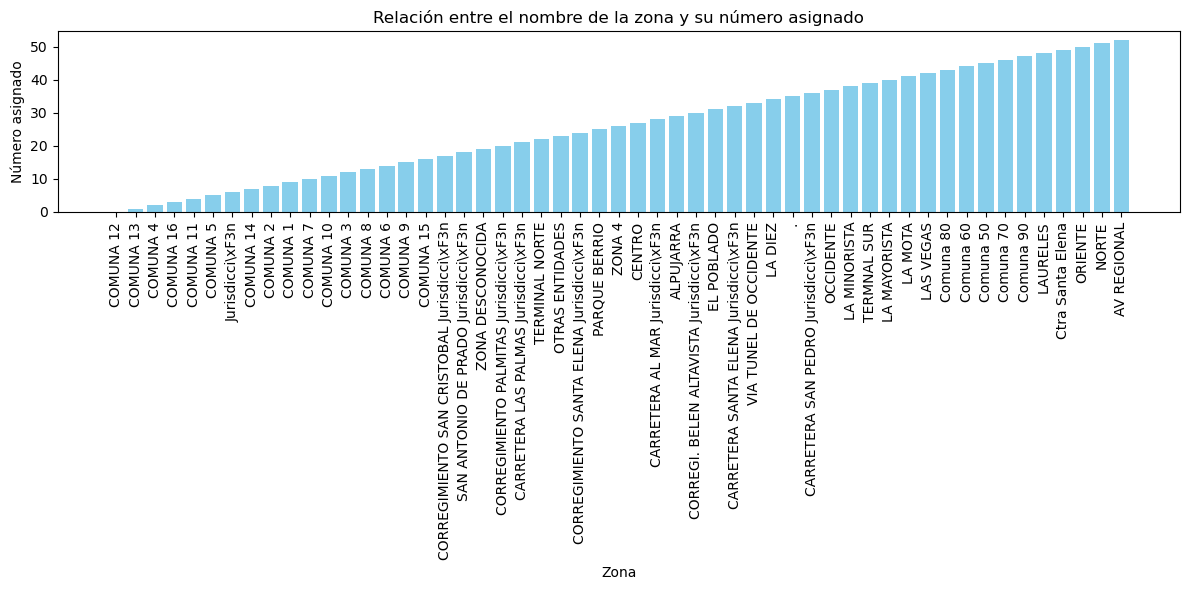

In [47]:
#Utilizar pd.factorize() para transformar la columna 'ZONA' a valores numéricos
data['ZONA_NUM'] = pd.factorize(data['ZONA'])[0]

#Mapeo de zona a su respectivo número para la gráfica
zona_mapping = dict(zip(data['ZONA'], data['ZONA_NUM']))

#Generar la gráfica corregida con nombres de zonas en el eje x
plt.figure(figsize=(12, 6))
plt.bar(list(zona_mapping.keys()), list(zona_mapping.values()), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Zona')
plt.ylabel('Número asignado')
plt.title('Relación entre el nombre de la zona y su número asignado')
plt.tight_layout()
plt.show()



**6. Selección de Características para el entrenamiento**

Se imprimirá una tabla con las columnas que se seleccionaron para el entrenamiento del modelo junto con los valores asignados en formato númerico.

In [49]:
#Crear un DataFrame con las características relevantes
features = data[['MES', 'DÍA', 'HORA_INCIDENTE', 'ZONA', 'CLASE_INCIDENTE', 'GRAVEDAD_INCIDENTE']]

#Tabla con las variables que se usarán para el modelo
print("Variables seleccionadas\n\n", features)

Variables seleccionadas

         MES  DÍA  HORA_INCIDENTE       ZONA  CLASE_INCIDENTE  \
0         1   10              23  COMUNA 12                2   
1         1   10              20  COMUNA 13                0   
2         1   10              17   COMUNA 4                2   
3         1   10              20  COMUNA 16                2   
4         1   10              14  COMUNA 11                2   
...     ...  ...             ...        ...              ...   
223434    8   30              16  COMUNA 14                2   
223435    8   30              16   COMUNA 7                0   
223436    8   30              16  COMUNA 10                2   
223437    8   30              17  COMUNA 10                2   
223438    8   30              17  COMUNA 10                2   

        GRAVEDAD_INCIDENTE  
0                        0  
1                        0  
2                        2  
3                        2  
4                        2  
...                    ...  
22

**7. Implementación del Modelo de Predicción**

En esta sección, se utilizará el modelo de Random Forest para predecir las zonas con mayor probabilidad de incidentes en función de la hora del incidente y otras variables relevantes. El modelo de Random Forest es adecuado debido a su capacidad para manejar grandes cantidades de datos y su resistencia al sobreajuste, lo que lo hace efectivo para este tipo de predicción en un conjunto de datos complejo y posiblemente desbalanceado.

***7.1.  Separación de Datos y Preparación de Conjuntos de Entrenamiento y Pruebas***

En este paso, se extrae el 10% de los datos para mantenerlo reservado para uso posterior, sin que participe en el entrenamiento del modelo. Posteriormente, se procede a dividir el 90% restante en conjunto de entrenamiento (70%) y conjunto de prueba (30%).

In [105]:
#Separar el 10% de los datos para uso específico (lo mantendremos para uso posterior)
data_10 = data.sample(frac=0.1, random_state=42)

#Usar el 90% restante para entrenamiento y prueba
data_remaining = data.drop(data_10.index)

#Dividimos el 90% restante en entrenamiento (70%) y prueba (30%)
X = data_remaining[['HORA_INCIDENTE','DÍA','MES', 'GRAVEDAD_INCIDENTE', 'CLASE_INCIDENTE']] #Variables seleccionadas
y = data_remaining['ZONA_NUM']  # Usamos la variable 'ZONA' como variable objetivo

#División de datos en conjuntos de entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

***7.2. Creación y entrenamiento del Modelo Random Forest***

Se creará y entrenará un modelo Random Forest con ajustes específicos, como el balance de clases para manejar desigualdades entre las categorías, un mayor número de árboles (200) para mejorar la precisión, limitación de la profundidad del árbol y el número mínimo de muestras por nodo para evitar sobreajuste. Posteriormente, el modelo se entrena con el conjunto de datos de entrenamiento.

In [54]:
#Crear y entrenar el modelo RandomForest con pesos balanceados
model_rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',#Ajuste para balancear las clases
    n_estimators=200, #Aumentamos el número de árboles
    max_depth=10, #Limitar la profundidad para evitar overfitting
    min_samples_split=5#Ajustamos el número mínimo de muestras para dividir un nodo
)

#Entrenamos el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

***7.3. Predicciones y Probabilidades de Predicción del Conjunto de Prueba***

En este paso, se utilizará el modelo entrenado para realizar predicciones sobre el conjunto de prueba, que son datos que el modelo no ha visto durante el entrenamiento. Primero, se generarán las predicciones de clase mediante "model_rf.predict(X_test)", lo que asignará a cada instancia del conjunto de prueba una clase específica (en este caso, una zona), basándose en las características proporcionadas. Estas predicciones nos indicarán a qué zona pertenece cada observación en el conjunto de prueba. 

Además, se calcularán las probabilidades de las predicciones usando "model_rf.predict_proba(X_test)", que proporcionará para instancia la probabilidad de que pertenezca a cada una de las posibles clases. Esto ayudará a dar una idea más precisa de la certeza con la que el modelo realiza sus predicciones, permitiendo la evaluación de la confianza del modelo en cada zona asignada y dar información adicional sobre las decisiones tomadas por el modelo.

In [56]:
#Realizamos predicciones sobre el conjunto de prueba
y_pred = model_rf.predict(X_test)

#Realizar predicciones de probabilidades sobre el conjunto de prueba
y_prob = model_rf.predict_proba(X_test)

***7.4. Preparación del Dataframe de Prueba con las Probabilidades***

Se prepara el DataFrame de prueba para incluir las probabilidades de las predicciones. Se copian los datos de prueba "X_test", se agregan las zonas reales ("ZONA_NUM") y las probabilidades máximas de las predicciones. Por consiguiente, se mapea el valor numérico de la zona de vuelta a su nombre original usando "zona_mapping". Esto va a permitir tener un conjunto de datos con las zonas predichas, las reales y sus probabilidades asociadas, facilitando el análisis de los resultados.

In [58]:
#Preparar el DataFrame de prueba con las probabilidades
data_test = X_test.copy()
data_test['ZONA_NUM'] = y_test
data_test['Probabilidad'] = y_prob.max(axis=1)  # Tomamos la máxima probabilidad como indicativo

#Mapeamos de nuevo los valores numéricos a las zonas originales utilizando zona_mapping
zona_mapping = dict(zip(data['ZONA'], data['ZONA_NUM']))#Mapeo para recuperar las zonas
data_test['ZONA'] = data_test['ZONA_NUM'].map({v: k for k, v in zona_mapping.items()})

***7.5. Análisis de Zonas y Horarios con Mayor Probabilidad de Incidentes***

Se procederá a agrupar los datos por "ZONA" y "HORA_INCIDENTE" para calcular la probabilidad promedio de incidentes en cada combinación, teniendo en cuenta cada una de las variables que utilizamos. Luego, los resultados se ordenan por la probabilidad, destacando las zonas y horarios con mayor probabilidad de incidentes. Finalmente, se muestran las 10 zonas y horarios con mayor probabilidad de incidentes.

In [60]:
#Agrupar por 'ZONA' y 'HORA_INCIDENTE' para calcular la probabilidad promedio de incidentes
zonas_horarios_prob = data_test.groupby(['ZONA', 'HORA_INCIDENTE'])['Probabilidad'].mean().reset_index()

#Ordenamos por la probabilidad para mostrar las zonas con mayor probabilidad de incidentes
zonas_horarios_prob = zonas_horarios_prob.sort_values(by='Probabilidad', ascending=False)

#Convertir la probabilidad a porcentaje
zonas_horarios_prob['Probabilidad'] = zonas_horarios_prob['Probabilidad'] * 100  # Multiplicamos por 100 para convertirlo a porcentaje

#Mostrar las zonas y horarios con mayor probabilidad de incidentes
print("\nZonas y horarios con mayor probabilidad de incidentes\n")
print(zonas_horarios_prob.head(10))  # Mostrar las 10 primeras zonas con mayor probabilidad



Zonas y horarios con mayor probabilidad de incidentes

                                    ZONA  HORA_INCIDENTE  Probabilidad
29   CARRETERA SAN PEDRO Jurisdicci\xF3n              22     68.189069
633                            LAS VEGAS              21     64.610491
670                       TERMINAL NORTE              19     62.179492
673                          TERMNAL SUR              18     58.063792
591                           EL POBLADO               7     48.308395
672                          TERMNAL SUR              13     44.863215
28   CARRETERA SAN PEDRO Jurisdicci\xF3n              20     42.012167
519                            Comuna 50              18     41.529887
630                         LA MINORISTA              21     32.074369
572                            Comuna 90               0     31.499830


***7.6. Visualización de Resultados - Zonas con Mayor Probabilidad de Incidentes***

Se creará una gráfica de barras para visualizar la predicción de las 10 zonas con mayor probabilidad de incidentes 

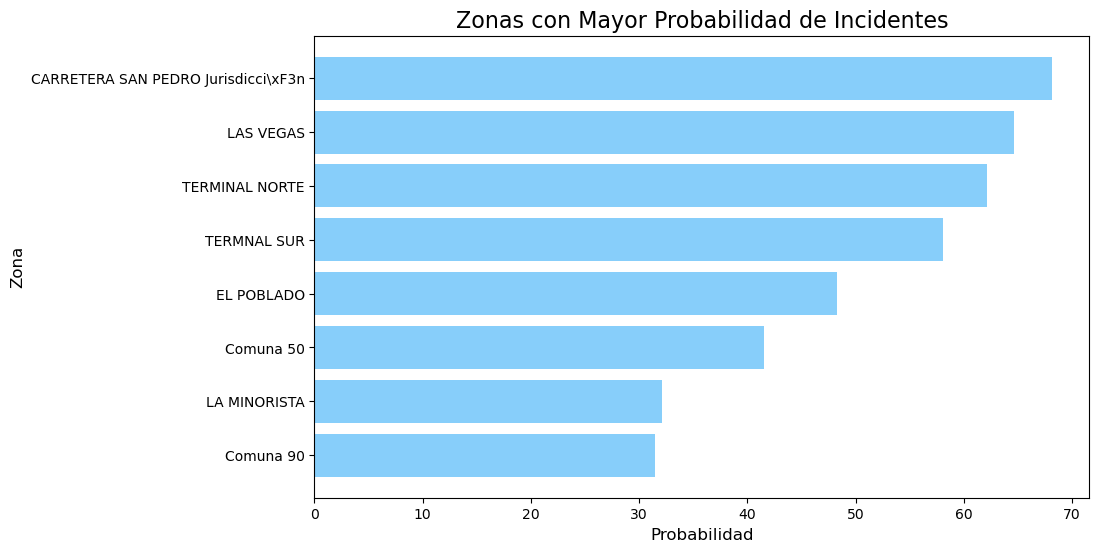

In [62]:
#Tomamos las 10 zonas con mayor probabilidad de incidentes
top_zonas = zonas_horarios_prob.head(10)

#Configuramos el tamaño de la figura
plt.figure(figsize=(10, 6))

#Color único en un tono de azul claro
color_azul_claro = '#87CEFA'  # Código de color para azul claro

#Creamos el gráfico de barras horizontal, asignando el mismo color a todas las barras
plt.barh(top_zonas['ZONA'], top_zonas['Probabilidad'], color=color_azul_claro)

#Títulos y etiquetas
plt.title('Zonas con Mayor Probabilidad de Incidentes', fontsize=16)
plt.xlabel('Probabilidad', fontsize=12)
plt.ylabel('Zona', fontsize=12)

#Invertir el eje Y para que la zona con mayor probabilidad quede arriba
plt.gca().invert_yaxis()

#Mostrar el gráfico
plt.show()
